# Project: Investigate a Dataset "No-show Appointments"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <li style="margin-left:16px"><a href="#general">General Properties</a></li>
    <li style="margin-left:16px"><a href="#cleaning">Data Cleaning</a></li>
        <li style="margin-left:32px"><a href="#naming">Conventional naming of columns</a></li>
        <li style="margin-left:32px"><a href="#index">Set up index</a></li>
        <li style="margin-left:32px"><a href="#genderformat">Change format of 'gender' column</a></li>
        <li style="margin-left:32px"><a href="#patientformat">Change format of 'patient_id' column</a></li>
        <li style="margin-left:32px"><a href="#dateformat">Change format of dates</a></li>
        <li style="margin-left:32px"><a href="#leadtime">Create 'lead_time' column</a></li>
        <li style="margin-left:32px"><a href="#noshowformat">Change format of 'no_show' column</a></li>
        <li style="margin-left:32px"><a href="#agemistakes">Clean wrong values in 'age' column</a></li>
        <li style="margin-left:32px"><a href="#handicapformat">Change format of 'handicap' column</a></li>
        <li style="margin-left:32px"><a href="#diplicates">Drop duplicates</a></li>
        <li style="margin-left:32px"><a href="#generalcleaning">Confirm dataset after cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <li style="margin-left:16px"><a href="#question">Question for analysis</a></li>
        <li style="margin-left:32px"><a href="#1">'patient_id'</a></li>
        <li style="margin-left:32px"><a href="#2">'gender'</a></li>
        <li style="margin-left:32px"><a href="#3">'age'</a></li>
        <li style="margin-left:32px"><a href="#4">'neighbourhood'</a></li>
        <li style="margin-left:32px"><a href="#5">'scholarship'</a></li>
        <li style="margin-left:32px"><a href="#6">'hypertension'</a></li>
        <li style="margin-left:32px"><a href="#7">'diabetes'</a></li>
        <li style="margin-left:32px"><a href="#8">'alcoholism'</a></li>
        <li style="margin-left:32px"><a href="#9">'handicap'</a></li>
        <li style="margin-left:32px"><a href="#10">'sms_received'</a></li>
        <li style="margin-left:32px"><a href="#11">'lead_time'</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 110k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row:
* `PatientID` - Identification number associated with each unique patient
* `AppointmentID` - 7 digits unique identification number of each appointment
* `Gender` - 'F' for Female and 'M' for Male
* `ScheduledDay` - The day someone called or registered the appointment
* `AppointmentDay` - The day of the actual appointment, when patient have to visit doctor
* `Age` - How old is the patient
* `Neighbourhood` - Where the appointment takes place. Indicates the location of the hospital
* `Scholarship` - Indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia). 0 = No, 1 = Yes
* `Hipertension` - If patient have mentioned condition. 0 = No, 1 = Yes
* `Diabetes` - If patient have mentioned condition. 0 = No, 1 = Yes
* `Alcoholism` - If patient have mentioned condition. 0 = No, 1 = Yes
* `Handcap` - If patient have handicapping conditions. 0 = No, 1 = 1 handicapping condition, 2 = 2 handicapping conditions etc.
* `SMS_received` - If patient was reminded by SMS about upcomming appointment. 0 = No, 1 = Yes
* `No-show` - It says 'No' if the patient showed up to their appointment, and 'Yes' if they did not show up

In this investigation I will try to answer next question: "What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?".

To operate data, make analysis and visualization I choose Python 3.7 Anaconda distribution with Jupyter Notebook as Development Environment. Notebook, Anaconda environment YAML file and dependencies can be found in [my GitHub repository](https://github.com/Wildbird74/No-show-Appointments).

In next snippet you can find list of all libraries which will be used for analysis.

In [1]:
# For importing data from CSV, dataframe manipulations
import pandas as pd

# For visualization
from matplotlib import pyplot as plt

# Enabling graph to be shown in Jupyter Notebook directly
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Let's read data from CSV file

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='general'></a>
### General Properties

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.duplicated().sum()

0

<a id='cleaning'></a>
### Data Cleaning

Observation for Data Cleaning step:
1. It will be beneficial to convert all column names to conventional naming format (underscore instead of hyphen, low letters etc.)
2. `AppointmentID` is an unique identificator of each entry and can be used as Index
3. `Gender` to simplify analysis process can be converted from Str to Int
4. `PatientId` have data type Float, but should be Int
5. `ScheduledDay` and `AppointmentDay` has types Str, but should be Date/Datetime
6. I have a hypothesis that `lead_time`, which are `AppointmentDay`-`ScheduledDay` and must be >= 0, will have correlation with `no-show`
  * Because `ScheduledDay` have Date and Time information, but `AppointmentDay` only Date information, so `lead_time` for reservation on the same day will have value of -1. To fix this I will remove Time information from `ScheduledDay`
  * There might be other situations, where `lead_time` will be less than 0 (same day reservation), which is obviously a mistake. All such entries will be dropped from dataset
7. `No-show` to simplify analysis process can be converted from Str to Int
8. `Age` have values, which are less than 0. All such entries will be dropped from dataset
9. Number of people with multiple handicapping conditions extremly low compare to dataset size, so I will convert `Handcap` to binar classificator, where 0 = no handicapping conditions, 1 = any number of handicapping conditions
10. There are no duplicates in dataset, as every line have unique `AppointmentID`, need to validate any duplicates w/o this column, as it might be that same appointment was saved twice with different ID. If there will be any duplicates - they will be removed

<a id='naming'></a>
1. Conventional naming format

In [8]:
# In all columns names removing leading and trailing characters, make characters lowercased, replace hyphen with undescore
df.rename(columns=lambda x:x.strip().lower().replace("-", "_"), inplace=True)

# Separating words with underscores and changing Spanish to English words
df.rename(columns={'patientid':'patient_id', 'appointmentid':'appointment_id', 'scheduledday':'scheduled_day', 'appointmentday':'appointment_day', 'hipertension':'hypertension', 'handcap':'handicap'}, inplace=True)

<a id='index'></a>
2. Make `appointment_id` an Index

In [9]:
df.set_index('appointment_id', inplace=True)

<a id='genderformat'></a>
3. Change format of `gender` to Int

In [10]:
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

<a id='patientformat'></a>
4. Change format of `patient_id` to Int

In [11]:
# Checking what the biggest value in `patient_id` to decide if int32 will be enough
df['patient_id'].max()

999981631772427.0

* int32	Integer (-2147483648 to 2147483647)
* int64	Integer (-9223372036854775808 to 9223372036854775807)

So we should use int64

In [12]:
df['patient_id'] = df['patient_id'].astype('int64')

<a id='dateformat'></a>
5. Convert `scheduled_day` and `appointment_day` to Date format

In [13]:
df.scheduled_day = pd.to_datetime(df.scheduled_day).dt.date
df.appointment_day = pd.to_datetime(df.appointment_day).dt.date

<a id='leadtime'></a>
6. Create `lead_time` and validate mistakes in data

In [14]:
# Create `lead_time` column in days
df['lead_time'] = (df.appointment_day - df.scheduled_day).dt.days

In [15]:
# Checking if there are any `lead_time` which less than 0
df.query('lead_time < 0')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
appointment_id,,,,,,,,,,,,,,
5679978,7839272661752,1,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
5715660,7896293967868,0,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
5664962,24252258389979,0,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
5686628,998231581612122,0,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
5655637,3787481966821,1,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [16]:
# Dropping wrong entries
df = df[df.lead_time >= 0]

In [17]:
# Validating that there are no wrong entries anymore
df.query('lead_time < 0')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
appointment_id,,,,,,,,,,,,,,


<a id='noshowformat'></a>
7. Change format of `no_show` to Int

In [18]:
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})

<a id='agemistakes'></a>
8. Clean mistakes in `age`

In [19]:
# Checking how many entries of the `age` which less than 0
df.query('age < 0')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
appointment_id,,,,,,,,,,,,,,
5775010,465943158731293,0,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,0,0


In [20]:
# Dropping wrong entries
df = df[df.age >= 0]

In [21]:
# Validating that there are no wrong entries anymore
df.query('age < 0')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
appointment_id,,,,,,,,,,,,,,


<a id='handicapformat'></a>
9. Convert `handicap` to binar classificator

In [22]:
# Replacing all countings of handicapping conditions with 1
df.loc[df.handicap > 1, 'handicap'] = 1

# Validating replacement
df.handicap.unique()

array([0, 1], dtype=int64)

<a id='diplicates'></a>
10. Checking for duplicates after cleaning

In [23]:
# Count number of duplicated rows
df.duplicated().sum()

4222

I can see 2 possible explanations for duplicates:

1. There are mistake in database handling
2. People did several reservation on the same day 
  * Appointment time change (new appointment was added, but old one was not deleted)
  * Several appointments on the same day for different doctors

Because there are no way to validate reasons for this duplicates, we will drop them.

In [24]:
df.drop_duplicates(inplace=True)

Rows count in dataset after cleaning should be 110,527 - 5 (invalid `lead_time`) - 1 (invalid `age`) - 4,222 (duplicates) = 106,299

In [25]:
df.shape

(106299, 14)

<a id='generalcleaning'></a>
Let's check general properties one more time to confirm cleaning process

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106299 entries, 5642903 to 5629448
Data columns (total 14 columns):
patient_id         106299 non-null int64
gender             106299 non-null int64
scheduled_day      106299 non-null object
appointment_day    106299 non-null object
age                106299 non-null int64
neighbourhood      106299 non-null object
scholarship        106299 non-null int64
hypertension       106299 non-null int64
diabetes           106299 non-null int64
alcoholism         106299 non-null int64
handicap           106299 non-null int64
sms_received       106299 non-null int64
no_show            106299 non-null int64
lead_time          106299 non-null int64
dtypes: int64(11), object(3)
memory usage: 12.2+ MB


In [27]:
df.describe()

,patient_id,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
count,1.062990e+05,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000
mean,1.467593e+14,0.345394,37.116661,0.098072,0.198958,0.072748,0.027987,0.019916,0.333719,0.204000,10.409336
std,2.551417e+14,0.475499,23.173150,0.297414,0.399218,0.259723,0.164937,0.139711,0.471543,0.402971,15.369584
min,3.921700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.151415e+12,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.154590e+13,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.433654e+13,1.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,9.999816e+14,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [28]:
df.nunique()

patient_id         62298
gender                 2
scheduled_day        111
appointment_day       27
age                  103
neighbourhood         81
scholarship            2
hypertension           2
diabetes               2
alcoholism             2
handicap               2
sms_received           2
no_show                2
lead_time            129
dtype: int64

In [29]:
df.isnull().sum()

patient_id         0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
lead_time          0
dtype: int64

In [30]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

In [31]:
df.describe()

,patient_id,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
count,1.062990e+05,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000
mean,1.467593e+14,0.345394,37.116661,0.098072,0.198958,0.072748,0.027987,0.019916,0.333719,0.204000,10.409336
std,2.551417e+14,0.475499,23.173150,0.297414,0.399218,0.259723,0.164937,0.139711,0.471543,0.402971,15.369584
min,3.921700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.151415e+12,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.154590e+13,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.433654e+13,1.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,9.999816e+14,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


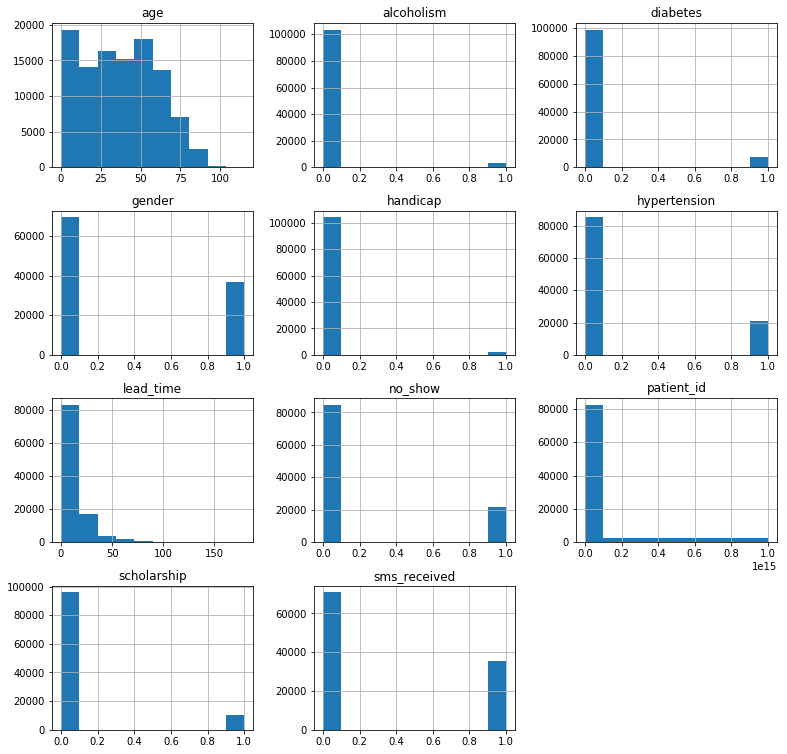

In [32]:
df.hist(figsize=(13, 13));

<a id='question'></a>
### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

Let's check how each factor impact on `no_show` rate one-by-one

<a id='1'></a>
1. `patient_id` there are 62,298 unique patients, who did 106,299 reservations. 

In [33]:
# Find all patients 
reservation = df.groupby('patient_id').count()
reservation = reservation.drop(columns=['scheduled_day', 'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show', 'lead_time'])
reservation.columns = ['reservations_count']
reservation.head()

,reservations_count
patient_id,
39217,1
43741,1
93779,1
141724,1
537615,1


Let's check how many patients did multiple reservations

In [34]:
reservation.reservations_count.value_counts().sort_index()

1     38767
2     13731
3      5317
4      2238
5      1022
6       462
7       250
8       166
9        89
10       81
11       37
12       35
13       29
14       18
15        9
16        8
17        6
18        5
19        5
20        3
21        1
22        3
23        2
25        3
26        1
27        2
28        3
29        1
30        1
31        1
33        1
35        1
Name: reservations_count, dtype: int64

To exclude possibility of unfortunate events, let's cut-off 1-4 reservations and consider that 5 and more reservations will tell us about patience behaviour. I will combine count of reservations with percentage of `no_show` for each `patient_id`

In [35]:
reservation_no_show = df.groupby('patient_id').mean()
reservation_no_show = reservation_no_show.drop(columns=['gender', 'age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'lead_time'])
reservation_no_show.head()

,no_show
patient_id,
39217,0.0
43741,0.0
93779,0.0
141724,0.0
537615,0.0


In [36]:
reservation_final = pd.merge(reservation, reservation_no_show, left_index=True, right_index=True)
reservation_final = reservation_final[reservation_final.reservations_count >= 5]
reservation_final.sort_values(['no_show', 'reservations_count'], ascending=False).head(20)

,reservations_count,no_show
patient_id,,
65751443779385,9,1.000000
93388598973955,7,1.000000
97173476551,6,1.000000
24169265844,5,1.000000
28516799229,5,1.000000
216298164113,5,1.000000
1421986987763,5,1.000000
5443246792943,5,1.000000
56223961661455,5,1.000000


Let's vizualize this results, by bucketing into next groups by `no_show`:
  * 0.0 - always show-up
  * 0.000001 - 0.2 - skip 1 appointment
  * 0.200001 - 0.499999 - skip up to half of appointments
  * 0.5 - 0.799999 - skip half or more of appointments
  * 0.8 - 0.999999 - show-up on 1 appointment
  * 1.0 - never show-up

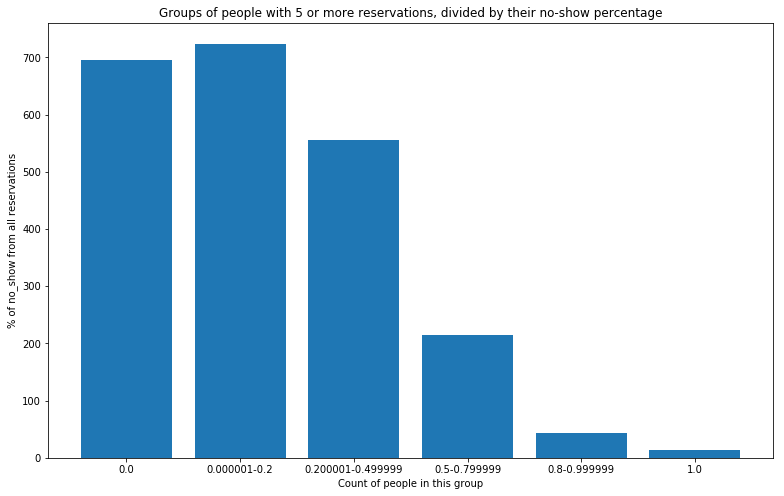

In [37]:
groups = pd.Series(['0.0', '0.000001-0.2', '0.200001-0.499999', '0.5-0.799999', '0.8-0.999999', '1.0'])
reservation_final['no_show_groups'] = pd.cut(reservation_final.no_show, bins = [-1, 0, 0.2, 0.4999999, 0.799999, 0.999999, 1.1], labels=groups)
reservation_group = reservation_final.groupby('no_show_groups').count()

locations = [1, 2, 3, 4, 5, 6]
heights = reservation_group.no_show
labels=['0.0', '0.000001-0.2', '0.200001-0.499999', '0.5-0.799999', '0.8-0.999999', '1.0']

plt.figure(figsize=(13, 8))
plt.bar(locations, heights, tick_label=labels)
plt.title('Groups of people with 5 or more reservations, divided by their no-show percentage')
plt.xlabel('Count of people in this group')
plt.ylabel('% of no_show from all reservations');

Findings:
  * Based on history of reservations was found groups of people to whom we can give extra confidence in show/no-show outcome

<a id='2'></a>
2. `gender` 34.54% Males and 65.46% Females

In [38]:
df.groupby('gender').mean()

,patient_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
gender,,,,,,,,,,
0,1.454017e+14,38.962851,0.122887,0.214776,0.078567,0.016354,0.017576,0.347738,0.204932,10.669493
1,1.493323e+14,33.617677,0.051042,0.168977,0.061719,0.050034,0.024350,0.307150,0.202233,9.916274


Findings:
  * Males almost 5 times more frequently have alcoholism (5% for Males vs. 1.63% for Females)
  * There is no significant correlation between `gender` and `no-show` 

<a id='3'></a>
3. `age` 96% of the whole population fit between 0 and 83 years (based on mean and std). It seems to be convenient to use quartiles values for bucketing this column, but to be more precise each quartile i will divide in halfes as well (8 buckets)
  * 0-9 years old - minors, who most likely assisted by parents
  * 10-18 years old - teenagers, who most likely visit doctor by their own
  * 19-28 years old
  * 29-37 years old
  * 38-47 years old
  * 48-56 years old
  * 57-64 years old
  * 65+ years old (as 65 years old legal retirement ahe in Brazil)

In [39]:
groups = pd.Series(['0-9', '10-18', '19-28', '29-37', '38-47', '48-56', '57-64', '65+'])
df['age_groups'] = pd.cut(df.age, bins = [0, 9, 18, 28, 37, 47, 56, 64, 115], labels=groups)
age_group = df.groupby('age_groups').mean()
age_group

,patient_id,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
age_groups,,,,,,,,,,,
0-9,1.476239e+14,0.527328,4.679489,0.112580,0.000594,0.000594,0.000371,0.003713,0.304916,0.204292,9.711644
10-18,1.469157e+14,0.411380,14.215634,0.141516,0.002946,0.003959,0.001841,0.017033,0.317190,0.251266,9.496823
19-28,1.451317e+14,0.262413,23.412791,0.114356,0.014678,0.005991,0.012282,0.011833,0.359844,0.252453,10.153598
29-37,1.462550e+14,0.276144,33.031896,0.160961,0.071746,0.018872,0.027919,0.016923,0.351868,0.223895,10.332294
38-47,1.503383e+14,0.297208,42.427553,0.141220,0.172814,0.052461,0.051212,0.020500,0.350551,0.213666,10.314107
48-56,1.453489e+14,0.308372,52.031634,0.070792,0.328974,0.107613,0.060564,0.020967,0.348992,0.182130,10.647575
57-64,1.439763e+14,0.319481,60.347065,0.050540,0.438617,0.172126,0.051810,0.027856,0.340622,0.159786,10.959532
65+,1.459225e+14,0.323972,73.927008,0.020030,0.591917,0.233516,0.023594,0.045121,0.314135,0.154893,11.403664


Findings:
  * Minors (0-18) have 47.56% of Males and 52.44% of Females, but for other `age_groups` percent of Males drops to ~30% - possible reason is heavy inclusion of Males into workforce
  * `hypertension`, `diabetes`, `alcoholism` and `handicap` have strong positive correlation with `age`
  * percentage of `no_show` have correlation to `age`, which have exemption age group of 0-9 from linear

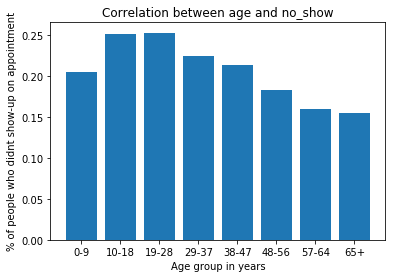

In [40]:
locations = [1, 2, 3, 4, 5, 6, 7, 8]
heights = age_group.no_show
labels=['0-9', '10-18', '19-28', '29-37', '38-47', '48-56', '57-64', '65+']

plt.bar(locations, heights, tick_label=labels)
plt.title('Correlation between age and no_show')
plt.xlabel('Age group in years')
plt.ylabel('% of people who didnt show-up on appointment');

<a id='4'></a>
4. `neighbourhood` have 81 unique entry. Let's check how many people belong to each area

In [41]:
neighbourhood = df.groupby('neighbourhood').count()
neighbourhood.patient_id.unique()

array([   8, 2150,  263,  275,  401, 1836,  805,  309, 2622, 2474, 3169,
        294,  822, 1321, 1332, 2111,  298,  544,  398,  825,  233,  504,
        653, 1806,  257,  687, 1048, 1934,  169, 1042, 1789,   35,   10,
       2201,    2, 1018, 3403, 2398, 7413, 3714, 2747, 1376,  651, 5605,
       1850,  620,  817,   96,  334,  134, 2208,    1,  777,  428,   63,
        957, 1272, 1457,  801, 4248, 2086,  440,  485,  174,  405,  420,
       2951, 1281, 2484, 2649, 1257,  524,  141,  459, 1380, 1802, 1896,
       2388, 3070,  152,  840], dtype=int64)

For total population of 62,298 people, with confidence level of 95% and margin of error 5% our sample size should be 382 or more. Let's remove all areas which less than sample size

In [42]:
neighbourhood = neighbourhood[neighbourhood.patient_id >= 382]
neighbourhood = neighbourhood.drop(columns=['gender', 'scheduled_day', 'appointment_day', 'age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show', 'lead_time', 'age_groups'])
neighbourhood.columns = ['area_population']
neighbourhood.head()

,area_population
neighbourhood,
ANDORINHAS,2150
BARRO VERMELHO,401
BELA VISTA,1836
BENTO FERREIRA,805
BONFIM,2622


In [43]:
neighbourhood_no_show = df.groupby('neighbourhood').mean()
neighbourhood_no_show = neighbourhood_no_show.drop(columns=['patient_id', 'gender', 'age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'lead_time'])
neighbourhood_no_show.head()

,no_show
neighbourhood,
AEROPORTO,0.125000
ANDORINHAS,0.227907
ANTÔNIO HONÓRIO,0.186312
ARIOVALDO FAVALESSA,0.221818
BARRO VERMELHO,0.221945


In [44]:
# Merging filtered area population dataframe with no_show mean per area dataframe
neighbourhood_final = pd.merge(neighbourhood, neighbourhood_no_show, left_index=True, right_index=True)
neighbourhood_final.describe()

,area_population,no_show
count,61.000000,61.000000
mean,1689.360656,0.204489
std,1310.820036,0.028032
min,398.000000,0.150327
25%,777.000000,0.187348
50%,1332.000000,0.201789
75%,2208.000000,0.221945
max,7413.000000,0.290374


96% of all areas will be in range of `no_show` 14.95% to 25.94%. There are no areas with abnormally low `no_show`, but several areas with abnormally high percent of `no_show`, which can give us extra confidence inprobability of patient from this area to don't show-up

In [45]:
neighbourhood_final.query('no_show > 0.25943172')

,area_population,no_show
neighbourhood,,
ITARARÉ,3403,0.263003
SANTA CECÍLIA,440,0.275000
SANTOS DUMONT,1257,0.290374


Findings:
  * There are 3 areas which have abnormally high rate on `no_show` patients

<a id='5'></a>
5. `scholarship` 9.81% have scholarship. I expect that age of this group will be lower than general population

In [46]:
# Vaidating hypothesis about scholarship group mean age
df.groupby('scholarship').mean()

,patient_id,gender,age,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
scholarship,,,,,,,,,,
0,1.469554e+14,0.363404,37.832415,0.201953,0.07490,0.026107,0.020329,0.333448,0.200211,10.563271
1,1.449553e+14,0.179760,30.534197,0.171415,0.05295,0.045276,0.016115,0.336211,0.238849,8.993669


Findings:
  * Mean `age` of the scholarship owners 30.53 years old vs. mean `age` of the non-scholarship owners 37.83 years old
  * % of people who skip appointment with `scholarship` higher than w/o `scholarship` (23.88% vs. 20.02%)

<a id='6'></a>
6. `hypertension` 19.9% of total population have this condition

In [47]:
df.groupby('hypertension').mean()

,patient_id,gender,age,scholarship,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
hypertension,,,,,,,,,,
0,1.473149e+14,0.358321,31.266459,0.101445,0.016594,0.020881,0.013823,0.335948,0.211392,10.565015
1,1.445221e+14,0.293347,60.670717,0.084496,0.298832,0.056598,0.044447,0.324743,0.174240,9.782543


Findings:
* % of people who skip appointment with `hypertension` lower than w/o `hypertension` (17.42% vs. 21.14%)

<a id='7'></a>
7. `diabities` 7.27% of total population have this conditions
  * According to [International Diabetes Federation](https://idf.org/52-about-diabetes.html) 90% of all diabetes cases refer to Diabetes type 2, which is most commonly diagnosed in older adults

In [48]:
df.groupby('diabetes').mean()

,patient_id,gender,age,scholarship,hypertension,alcoholism,handicap,sms_received,no_show,lead_time
diabetes,,,,,,,,,,
0,1.465766e+14,0.349502,35.211990,0.100166,0.150447,0.026946,0.017501,0.336008,0.205730,10.535235
1,1.490876e+14,0.293030,61.393896,0.071382,0.817277,0.041252,0.050692,0.304539,0.181947,8.804604


Findings:
  * Mean `age` of the people with diabetes 61.39 years old vs. mean `age` of the people w/o diabetes 35.21 years old
  * 81.73% of people who have `diabetes`, have `hypertension` as well
  * People with `diabetes` condition have lower rate of `no_show` than people w/o `diabetes` (18.19% vs. 20.57%)

<a id='8'></a>
8. `alcoholism` 2.8% of total population have this condition

In [49]:
df.groupby('alcoholism').mean()

,patient_id,gender,age,scholarship,hypertension,diabetes,handicap,sms_received,no_show,lead_time
alcoholism,,,,,,,,,,
0,1.464525e+14,0.337560,36.760123,0.096328,0.193101,0.071755,0.019792,0.33514,0.203525,10.490873
1,1.574131e+14,0.617479,49.499496,0.158655,0.402353,0.107227,0.024202,0.28437,0.220504,7.577479


Findings:
  * % of people who skip appointment with `alcoholism` higher than w/o `alcoholism` (22.05% vs. 20.35%)

<a id='9'></a>
9. `handicap` 1.99% of total population have this condition

In [50]:
df.groupby('handicap').mean()

,patient_id,gender,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,lead_time
handicap,,,,,,,,,,
0,1.470238e+14,0.343831,36.833013,0.098453,0.193978,0.070463,0.027865,0.335355,0.204594,10.453447
1,1.337418e+14,0.422296,51.075579,0.079358,0.444025,0.185168,0.034010,0.253188,0.174776,8.238545


Findings:
  * % of people who skip appointment with `handicap` lower than w/o `handicap` (17.48% vs. 20.46%)

<a id='10'></a>
10. 33.37% of total population received SMS notification

In [51]:
df.groupby('sms_received').mean()

,patient_id,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,no_show,lead_time
sms_received,,,,,,,,,,
0,1.482118e+14,0.359167,36.918447,0.097706,0.201638,0.075934,0.030060,0.022323,0.168076,6.096647
1,1.438593e+14,0.317895,37.512403,0.098805,0.193607,0.066387,0.023848,0.015110,0.275723,19.019761


Findings:
  * People who received SMS notification have 3 times longer lead time
  * People who received SMS notification have higher % of `no_show` than people who didn't had notification (27.57% vs. 16.81%)

<a id='11'></a>
11. `lead_time` 96% of the whole population fit between 0 and 41 day (based on mean and std). It seems to be convenient to use quartiles values for bucketing this column
  * 0 days - same day
  * 1-4 days
  * 5-15 days
  * 16+ days

In [52]:
lead_groups = pd.Series(['0', '1-4', '5-15', '16+'])
df['lead_time_groups'] = pd.cut(df.lead_time, bins = [-1, 0, 4, 15, 180], labels=lead_groups)
lead_time_group = df.groupby('lead_time_groups').mean()
lead_time_group

,patient_id,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
lead_time_groups,,,,,,,,,,,
0,1.500952e+14,0.372353,34.352051,0.108933,0.178641,0.068836,0.033434,0.023620,0.000000,0.045019,0.000000
1-4,1.395623e+14,0.335807,43.025264,0.081181,0.270435,0.105277,0.028619,0.024248,0.201098,0.229514,2.409008
5-15,1.481379e+14,0.329234,36.649611,0.107913,0.198505,0.070703,0.028075,0.016964,0.613350,0.284353,8.979556
16+,1.462969e+14,0.331368,36.879806,0.086324,0.172881,0.055325,0.019903,0.014394,0.621028,0.325044,32.280427


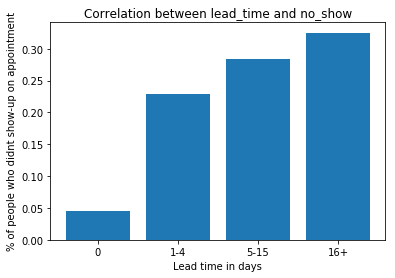

In [53]:
locations = [1, 2, 3, 4]
heights = lead_time_group.no_show
labels=['0', '1-4', '5-15', '16+']

plt.bar(locations, heights, tick_label=labels)
plt.title('Correlation between lead_time and no_show')
plt.xlabel('Lead time in days')
plt.ylabel('% of people who didnt show-up on appointment');

Findings:
  * People with same day reservation don't receive SMS reminder
  * Longer the `lead_time` higher percent of people who received SMS reminder and who didn't show-up for appointment

<a id='conclusions'></a>
## Conclusions

In [54]:
df.groupby('no_show').mean()

,patient_id,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,lead_time
no_show,,,,,,,,,,
0,1.469418e+14,0.346160,37.817241,0.093779,0.206396,0.074763,0.027407,0.020647,0.303650,8.992046
1,1.460470e+14,0.342403,34.383030,0.114826,0.169933,0.064884,0.030251,0.017062,0.451049,15.939543


Factors, which reduce probability of `no_show`:
 * Patients who belong to group of `patient_id` which have 0% to 20% of `no_show` in at least 5 last reservations
 * Patients who belong to group of `age_groups` 0-9 or 48+
 * Patients who have `hypertension`, `diabetes`, `handicap` conditions (strongly related to `age`)
 * Patients with same day reservation (`lead_time` = 0)
 
Factors, which increase probability of `no_show`:
 * Patients who belong to group of `patient_id` which have 80% to 100% of `no_show` in at least 5 last reservations
 * Patients who belong to group of `age_groups` 10-47
 * Patience who did reservation in `ITARARÉ`, `SANTA CECÍLIA`, `SANTOS DUMONT` areas
 * Patience who have `scholarship`
 * Patients who have `alcoholism` condition
 * Patients who have `lead_time` > 0

Factors, which has no impact on probability of `no_show`:
  * `gender`
  * `sms_received`